# 모델과 파라미터 찾기(결정트리)

## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

## 데이터셋 로드

In [2]:
df = pd.read_csv('data/diabetes_feature.csv')
df.shape

(768, 16)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_mid,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_mid', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
# feature
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [6]:
y = df['Outcome']
y.shape

(768,)

In [7]:
# 사이킷런에서 제공하는 model_selection의 train_test_split으로 만든다.
from sklearn.model_selection import train_test_split

# 데이터 랜덤하게 섞여서 나뉜다.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# train 세트의 문제와 정답의 데이터 수를 확인하자.
X_train.shape, y_train.shape

((614, 9), (614,))

In [9]:
# test 세트의 문제와 정답의 데이터 수를 확인하자.
X_test.shape, y_test.shape

((154, 9), (154,))

## 최적의 max_depth 값 찾기

In [10]:
for max_depth in range(3,12):
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_pred) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


## Grid Search

- estimator : 모델 설정
- praram_grid : 파라미터 설정
- scoring : 채점 방식 설정
- n_jobs : 프로세스 개수, 모든 프로세스를 사용하려면 -1로 설정한다.
- cv : 기본 5-fold cross validation한다.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

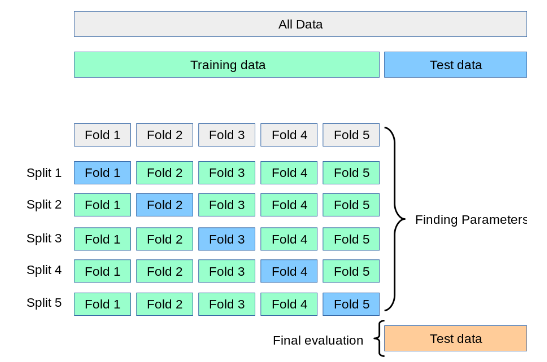

https://scikit-learn.org/stable/modules/cross_validation.html

In [11]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
model.get_params()

param_grid = {'max_depth': range(3,12), 'max_features': [0.3,0.5,0.7,0.9,1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    5.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [12]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [13]:
# 옵션 할당
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [14]:
clf.best_score_

0.8664934026389444

In [15]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.009395,0.004839,0.003998,1.094844e-03,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.011794,0.009615,0.006596,5.744393e-03,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.007196,0.000979,0.002998,5.560829e-07,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.008995,0.004048,0.005197,2.134296e-03,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.868852,0.858323,0.028361,4
27,0.006796,0.000400,0.003799,7.485067e-04,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [16]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [17]:
clf.score(X_test, y_test)

0.8701298701298701

## Random Search

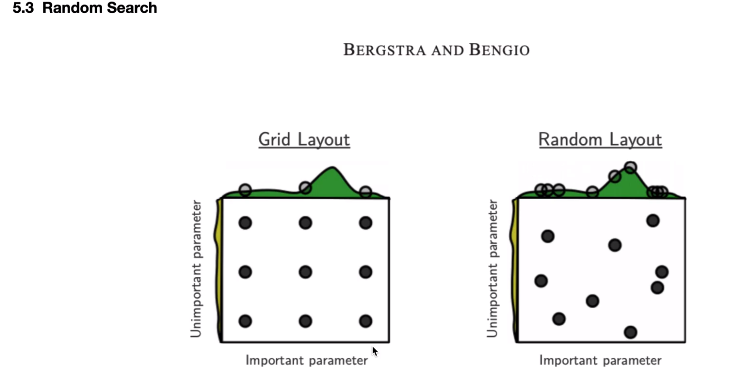

https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [18]:
max_depth = np.random.randint(3,20,10)
max_depth

array([17,  2,  3,  5,  5,  5, 16, 14,  4,  3])

In [37]:
import random

max_depth = random.sample(range(3,20),10)
max_depth

[6, 19, 12, 15, 17, 10, 18, 7, 11, 8]

In [38]:
max_features = np.random.uniform(0.7,1.0, 100)
max_features

array([0.86187087, 0.75294123, 0.96009785, 0.97234283, 0.9618409 ,
       0.8002105 , 0.84123529, 0.95060033, 0.84116039, 0.77490398,
       0.79997912, 0.81483102, 0.94665846, 0.87542383, 0.77183219,
       0.81507406, 0.82873012, 0.88425672, 0.88201991, 0.81729932,
       0.95366448, 0.93057094, 0.70845228, 0.96049859, 0.71528461,
       0.855279  , 0.9620895 , 0.93947305, 0.772263  , 0.7627461 ,
       0.73069978, 0.76980779, 0.85276365, 0.92226812, 0.74929764,
       0.72851198, 0.82214663, 0.92220833, 0.97081299, 0.93054379,
       0.74519425, 0.99820844, 0.98637948, 0.7277484 , 0.99815673,
       0.79826197, 0.78735264, 0.85834288, 0.99171552, 0.77335073,
       0.92779644, 0.95303954, 0.79815759, 0.90645979, 0.7019501 ,
       0.82134875, 0.80456462, 0.93163617, 0.80634175, 0.70973224,
       0.8587692 , 0.94070686, 0.71193418, 0.78280113, 0.75967271,
       0.79749042, 0.70944775, 0.84782047, 0.77820542, 0.7935015 ,
       0.91031647, 0.91783845, 0.97870833, 0.78242176, 0.72383

In [39]:
param_distributions = {'max_depth':max_depth, 'max_features':max_features, 'min_samples_split':list(range(2,7))}
param_distributions

{'max_depth': [6, 19, 12, 15, 17, 10, 18, 7, 11, 8],
 'max_features': array([0.86187087, 0.75294123, 0.96009785, 0.97234283, 0.9618409 ,
        0.8002105 , 0.84123529, 0.95060033, 0.84116039, 0.77490398,
        0.79997912, 0.81483102, 0.94665846, 0.87542383, 0.77183219,
        0.81507406, 0.82873012, 0.88425672, 0.88201991, 0.81729932,
        0.95366448, 0.93057094, 0.70845228, 0.96049859, 0.71528461,
        0.855279  , 0.9620895 , 0.93947305, 0.772263  , 0.7627461 ,
        0.73069978, 0.76980779, 0.85276365, 0.92226812, 0.74929764,
        0.72851198, 0.82214663, 0.92220833, 0.97081299, 0.93054379,
        0.74519425, 0.99820844, 0.98637948, 0.7277484 , 0.99815673,
        0.79826197, 0.78735264, 0.85834288, 0.99171552, 0.77335073,
        0.92779644, 0.95303954, 0.79815759, 0.90645979, 0.7019501 ,
        0.82134875, 0.80456462, 0.93163617, 0.80634175, 0.70973224,
        0.8587692 , 0.94070686, 0.71193418, 0.78280113, 0.75967271,
        0.79749042, 0.70944775, 0.84782047, 0.7

In [46]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model,
                   param_distributions,
                   # 랜덤한 파라미터 가지고 100번의 for문이 돈다.
                   n_iter = 1000,
                   scoring = 'accuracy',
                   n_jobs = -1,
                   cv = 5,
                   verbose = 1,
                   random_state = 42,)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   21.7s finished


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=11,
                                                    random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': [6, 19, 12, 15, 17, 10, 18,
                                                      7, 11, 8],
                                        'max_features': array([0.86187087, 0.75294123, 0.96009785, 0.97234283, 0.9618409 ,
       0.8002105 , 0.84123529, 0.95060033, 0.84116039, 0.77490398,
       0.79997912, 0.81483102, 0.94665846, 0.87542383, 0.771...
       0.87764582, 0.76931139, 0.7346573 , 0.90935306, 0.92595256,
       0.70991371, 0.70844755, 0.75146958, 0.82269922, 0.92587391,
       0.92640657, 0.92304703, 0.87897003, 0.864369  , 0.77171955,
       0.75478819, 0.89685727, 0.95125837, 0.79897507, 0.82563124,
       0.7205401 , 0.79294753, 0.8693948 , 0.79903022, 0.72917316]),
                                        'min_samples_split'

In [47]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.7097322379577679, 'max_depth': 8}

In [48]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=0.7097322379577679,
                       min_samples_split=4, random_state=42)

In [49]:
clf.best_score_

0.8697321071571371

In [50]:
clf.score(X_test, y_test)

0.8766233766233766

In [53]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
886,0.009593,0.005745,0.003006,0.000632,4,0.7307,8,"{'min_samples_split': 4, 'max_features': 0.730...",0.886179,0.853659,0.821138,0.902439,0.885246,0.869732,0.028985,1
386,0.009400,0.002155,0.015191,0.015345,4,0.762746,8,"{'min_samples_split': 4, 'max_features': 0.762...",0.886179,0.853659,0.821138,0.902439,0.885246,0.869732,0.028985,1
153,0.011592,0.006707,0.004599,0.001854,4,0.709914,8,"{'min_samples_split': 4, 'max_features': 0.709...",0.886179,0.853659,0.821138,0.902439,0.885246,0.869732,0.028985,1
88,0.008795,0.004662,0.004598,0.003198,4,0.709732,8,"{'min_samples_split': 4, 'max_features': 0.709...",0.886179,0.853659,0.821138,0.902439,0.885246,0.869732,0.028985,1
942,0.010404,0.006475,0.004199,0.001938,4,0.70195,8,"{'min_samples_split': 4, 'max_features': 0.701...",0.886179,0.853659,0.821138,0.902439,0.885246,0.869732,0.028985,1
475,0.011392,0.002058,0.009800,0.013602,4,0.782801,10,"{'min_samples_split': 4, 'max_features': 0.782...",0.902439,0.886179,0.813008,0.845528,0.893443,0.868119,0.033743,6
783,0.016299,0.015112,0.003300,0.000597,4,0.852764,10,"{'min_samples_split': 4, 'max_features': 0.852...",0.902439,0.886179,0.813008,0.845528,0.893443,0.868119,0.033743,6
157,0.015391,0.009744,0.006797,0.006142,4,0.793501,10,"{'min_samples_split': 4, 'max_features': 0.793...",0.902439,0.886179,0.813008,0.845528,0.893443,0.868119,0.033743,6
78,0.014991,0.015025,0.003198,0.000400,4,0.800211,10,"{'min_samples_split': 4, 'max_features': 0.800...",0.902439,0.886179,0.813008,0.845528,0.893443,0.868119,0.033743,6
780,0.014693,0.008581,0.004996,0.001413,4,0.806342,10,"{'min_samples_split': 4, 'max_features': 0.806...",0.902439,0.886179,0.813008,0.845528,0.893443,0.868119,0.033743,6


## 학습과 예측하기

In [27]:
model = DecisionTreeClassifier(random_state=42, max_depth=11)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

- min_samples_leaf = 1 : 마지막 노드의 최소 샘플이 1개.
- min_samples_split = 2 : 샘플이 2개일 때까지 나뉜다.

In [28]:
# 학습 실행
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [29]:
# 예측을 하고 결과를 y_predict에 담는다.
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [30]:
feature_names = X_train.columns.tolist()

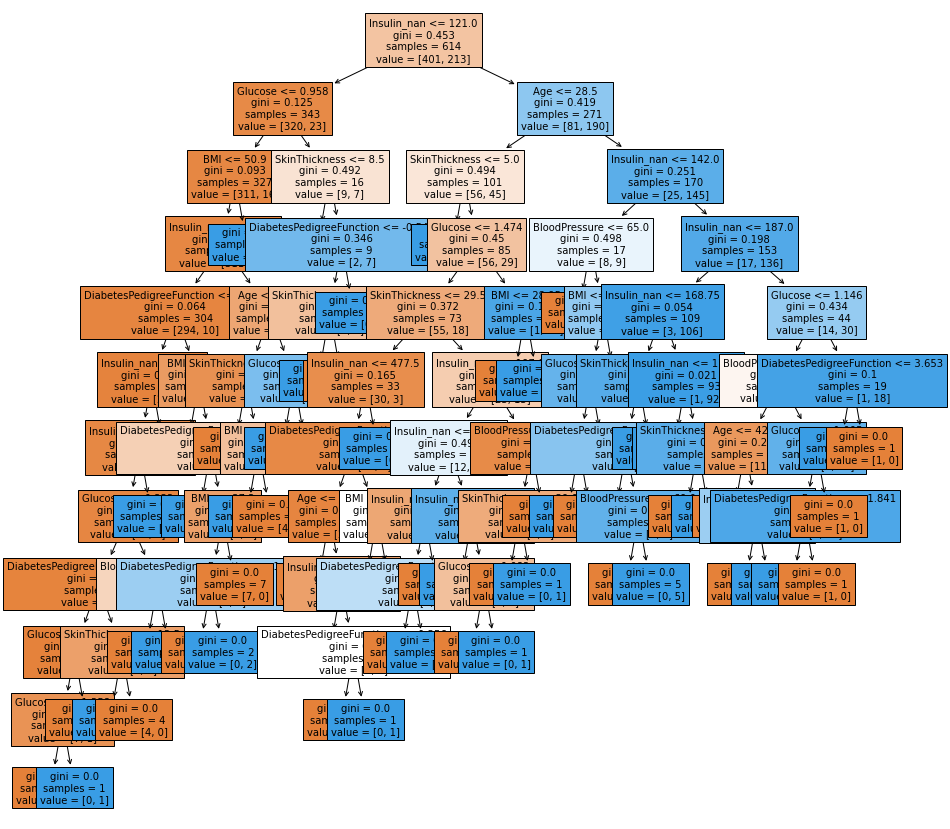

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names= feature_names,fontsize=10, filled=True)

- gni계수 0이면 트리 생성이 멈춘다.
- 샘플의 개수가 트리 밑으로 갈수록 줄어든다.
    - 한두 개의 샘플로 학습한 것을 일반화하면 오버피팅이 발생할 수 있다.

## 정확도 측정하기

In [32]:
# 다르게 예측한 갯수를 구해서 diff_count에 할당한다.
abs(y_predict - y_test).sum()

28

In [33]:
# 현실세계의 이슈에 따라 데이터가 달라져서 모델의 예측갑이 달라진다.
# accuracy score 구하기
accuracy_score(y_test, y_predict) * 100

81.81818181818183